# Practicing Natural Language Processing w/ Google & AWS APIs

![Chart Image](https://user-images.githubusercontent.com/30188729/37255914-a50f4d8e-2510-11e8-8d6b-352cd6ea4226.png)

<p id="toc"></p>
## Table of Contents

   1. <a href="#one">Introduction</a>
   2. <a href="#two">Import Libraries</a>
   3. <a href="#three">Import Data</a>
   4. <a href="#four">Explore Data</a>
   5. <a href="#five">Feature Selection</a>
   6. <a href="#six">Model Development</a>  

<hr style="width:50%;">
# <a id="one">1. Introduction</a>

### Assignment Instructions

Create a Jupyter notebook that does NLP analysis on a dataset by using 2/3 of these APIs (i.e. Google and Azure, or AWS and Google):
<br>
Amazon Comprehend:  https://aws.amazon.com/comprehend/ <br>
Cloud Natural Language:  https://cloud.google.com/natural-language/ <br><br>
In your notebook show how both work on your dataset and summarize your conclusions.  Remember, like all assignments, this is a great chance to prove your talent to companies looking to hire you.
<br><br>
Examples:
<br>
Azure:  https://github.com/noahgift/recommendations/blob/master/notebooks/Azure_Sentiment_Analysis.ipynb <br>
AWS:  https://github.com/noahgift/recommendations/blob/master/notebooks/NLP_AWS.ipynb <br>
GCP:  https://github.com/noahgift/recommendations/blob/master/notebooks/NLP_GCP.ipynb <br>

### Dataset Overview
This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.
<br> <br>
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:
<br><br>
Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.<br>
Age: Positive Integer variable of the reviewers age.<br>
Title: String variable for the title of the review.<br>
Review Text: String variable for the review body.<br>
Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.<br>
Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.<br>
Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.<br>
Division Name: Categorical name of the product high level division.<br>
Department Name: Categorical name of the product department name.<br>
Class Name: Categorical name of the product class name.<br>

<hr style="width:50%;">
# <a id="two">2. Import Libraries</a>
<p><a href="#toc">Jump to top</a></p>

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns; sns.set(color_codes=True)
from sklearn.cluster import KMeans
color = sns.color_palette()
from IPython.core.display import display, HTML
%matplotlib inline

C:\Users\sgus1\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [59]:
# For the google API
from google.cloud import storage
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types
import six

# for AWS API
import boto3

<hr style="width:50%;">
# <a id="three">3. Import Data</a>
<p><a href="#toc">Jump to top</a></p>

In [3]:
url= 'https://raw.githubusercontent.com/sgus1318/DeepLearning_and_NLP/master/Womens%20Clothing%20E-Commerce%20Reviews.csv'
df = pd.read_csv(url, error_bad_lines=False)

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [10]:
df.drop('Unnamed: 0',axis=1,inplace=True)

<hr style="width:50%;">
# <a id="four">Explore the Data</a>
<p><a href="#toc">Jump to top</a></p>

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [14]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [13]:
df[["Title", "Division Name","Department Name","Class Name"]].describe(include=["O"]).T.drop("count",axis=1)

,unique,top,freq
Title,13993,Love it!,136
Division Name,3,General,13850
Department Name,6,Tops,10468
Class Name,20,Dresses,6319


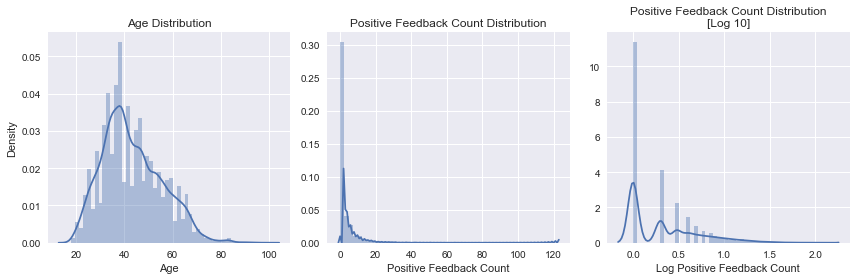

In [15]:
# Continous Distributions
f, ax = plt.subplots(1,3,figsize=(12,4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")
sns.distplot(df["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution")
sns.distplot(np.log10((df["Positive Feedback Count"][df["Positive Feedback Count"].notnull()]+1)), ax=ax[2])
ax[2].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[2].set_xlabel("Log Positive Feedback Count")
plt.tight_layout()
plt.show()

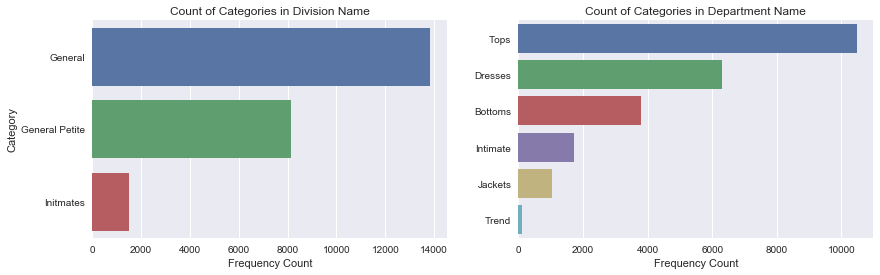

In [16]:
row_plots = ["Division Name","Department Name"]
f, axes = plt.subplots(1,len(row_plots), figsize=(14,4), sharex=False)

for i,x in enumerate(row_plots):
    sns.countplot(y=x, data=df,order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
plt.show()

<hr style="width:50%;">
# <a id="five">First API - Google</a>
<p><a href="#toc">Jump to top</a></p>

* https://cloud.google.com/natural-language/docs/analyzing-entities#language-entities-string-python

In order to make this work, you have to launch jupyter notebook with an authentication key. The steps to do so are outlined in the "Using Python API" section here: https://github.com/noahgift/recommendations/blob/master/notebooks/NLP_GCP.ipynb

In [77]:
# test that the authentication works
def implicit():
    from google.cloud import storage

    # If you don't specify credentials when constructing the client, the
    # client library will look for credentials in the environment.
    storage_client = storage.Client()

    # Make an authenticated API request
    buckets = list(storage_client.list_buckets())
    print(buckets)

In [23]:
# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In [17]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/Users/sgus1/MyFirstProject-a89cdeba1f89.json"

In [21]:
import json
json('/Users/sgus1/MyFirstProject-a89cdeba1f89.json')

TypeError: 'module' object is not callable

In [24]:
text = "LeBron James plays for the Cleveland Cavaliers."
client = language.LanguageServiceClient()
document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)
entities = client.analyze_entities(document).entities

PermissionDenied: 403 Cloud Natural Language API has not been used in project leafy-clone-183506 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/language.googleapis.com/overview?project=leafy-clone-183506 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry.

In [80]:
entities

[name: "LeBron James"
type: PERSON
metadata {
  key: "mid"
  value: "/m/01jz6d"
}
metadata {
  key: "wikipedia_url"
  value: "https://en.wikipedia.org/wiki/LeBron_James"
}
salience: 0.8991044759750366
mentions {
  text {
    content: "LeBron James"
    begin_offset: -1
  }
  type: PROPER
}
, name: "Cleveland Cavaliers"
type: ORGANIZATION
metadata {
  key: "mid"
  value: "/m/0jm7n"
}
metadata {
  key: "wikipedia_url"
  value: "https://en.wikipedia.org/wiki/Cleveland_Cavaliers"
}
salience: 0.10089549422264099
mentions {
  text {
    content: "Cleveland Cavaliers"
    begin_offset: -1
  }
  type: PROPER
}
]

In [81]:
import six

In [82]:
# Sentiment analysis
client = language.LanguageServiceClient()

def sentiment_text(text):
    """Detects sentiment in the text."""
    
    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    # Instantiates a plain text document.
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detects sentiment in the document. You can also analyze HTML with:
    #   document.type == enums.Document.Type.HTML
    sentiment = client.analyze_sentiment(document).document_sentiment

    return(sentiment.score)
    #print('Magnitude: {}'.format(sentiment.magnitude))
    
def magnitude_text(text):
    """Detects magnitude (emotion) in the text."""
    
    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    # Instantiates a plain text document.
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    sentiment = client.analyze_sentiment(document).document_sentiment

    return(sentiment.magnitude)

## AWS API Attempt

In [95]:
import boto3

In [96]:
comprehend = boto3.client(service_name='comprehend')

NoRegionError: You must specify a region.